In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead

In [2]:
# adata_rna = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.RNA_MOSCOT_paired_hvg.h5ad')
# adata_msi = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.MSI_MOSCOT_paired_hvg.h5ad')

# adata_rna = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11T16-085_A1.RNA_MOSCOT.h5ad')
# adata_msi = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11T16-085_A1.MSI_MOSCOT.h5ad')

# adata_rna = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/RNA_concat_neurotransmitters.h5ad')
# adata_msi = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/MSI_concat_neurotransmitters.h5ad')

# adata_rna = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/RNA_concat_lipids.h5ad')
# adata_msi = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/MSI_concat_lipids.h5ad')

In [3]:
##See the different stages the data passes dyring the preprocessing
msi = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.MSI_MOSCOT.h5ad')
msi_paired = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.MSI_MOSCOT_paired.h5ad')
msi_paired_hvg = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.MSI_MOSCOT_paired_hvg.h5ad')

In [7]:
msi

AnnData object with n_obs × n_vars = 2681 × 2754
    obs: 'technology', 'clusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [8]:
msi_paired

AnnData object with n_obs × n_vars = 2681 × 2754
    obs: 'technology', 'clusters', 'random_split', 'half_split', 'slide'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_warp'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [ ]:
adata_msi = msi_paired.copy()
#MSI processed only for highly variable metabolites, kept hvg_ for uniformality in vars
if "highly_variable" not in adata_msi.var.columns:
    sc.pp.highly_variable_genes(adata_msi, flavor='seurat', n_top_genes=500)
    
hvg_msi = adata_msi[:, adata_msi.var["highly_variable"]].copy()

In [18]:
import numpy as np

In [22]:
hvg_msi

AnnData object with n_obs × n_vars = 2681 × 500
    obs: 'technology', 'clusters', 'random_split', 'half_split', 'slide'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_warp'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [28]:
hvg_msi.X
hvg_msi_df = pd.DataFrame(hvg_msi.X)
hvg_msi_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,...,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,5.250499,1.297677,2.663327,2.258674,2.311205,0.733551,0.475699,0.360526,3.114915,3.431533,...,0.120774,0.064692,0.037496,0.038753,0.028942,0.051263,0.041072,0.049547,0.037942,0.038723
std,0.256358,0.217483,0.396604,0.478320,0.455149,0.324467,0.333547,0.306208,0.270124,0.232349,...,0.237486,0.169559,0.130829,0.132555,0.114970,0.154801,0.135072,0.149694,0.129231,0.130895
min,3.873640,0.319191,1.334127,0.586018,0.947612,0.000000,0.000000,0.000000,1.909393,2.647900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.098324,1.154720,2.400732,2.013653,2.070711,0.559096,0.321666,0.176136,2.962914,3.282296,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.264046,1.287768,2.637591,2.227596,2.274687,0.695561,0.464044,0.367197,3.112498,3.404364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.418673,1.438559,2.927841,2.455072,2.487058,0.859292,0.609234,0.500483,3.261635,3.540784,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.022736,2.285915,3.827415,6.796528,6.868988,4.735336,4.369722,3.803066,4.066353,4.378349,...,1.372775,1.414159,1.159255,1.613441,1.503603,0.984738,1.506734,1.592272,1.521499,1.139438


In [29]:
msi_paired_hvg.X
msi_paired_hvg_df = pd.DataFrame(msi_paired_hvg.X)
msi_paired_hvg_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,...,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,16.832302,12.553079,14.171650,13.721671,13.783150,11.520667,9.802601,8.450562,14.654903,14.985017,...,2.575959,1.710741,1.031486,1.188114,0.883931,1.302877,1.200151,1.320715,1.124553,1.170924
std,0.257863,0.304462,0.429109,0.532801,0.498623,1.159719,3.682850,4.636783,0.283781,0.239698,...,4.695376,3.929434,3.152407,3.308424,2.908568,3.522176,3.354622,3.528832,3.253707,3.303116
min,15.439885,10.609143,12.615683,11.360131,12.044388,0.000000,0.000000,0.000000,13.336273,14.161717,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.679445,12.363422,13.892953,13.457608,13.523174,11.298364,10.618170,9.940157,14.497111,14.831278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.846105,12.552213,14.150618,13.700793,13.753425,11.592078,11.060465,10.774623,14.654235,14.957819,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.001477,12.754959,14.460091,13.952551,13.987489,11.895831,11.411739,11.155737,14.809803,15.098612,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,17.607557,13.765933,15.392656,18.382657,18.455194,16.313764,15.944233,15.367758,15.636312,15.952971,...,12.667796,12.722845,12.370037,12.978545,12.839402,12.104324,12.843427,12.952040,12.862356,12.341029


In [9]:
msi_paired_hvg

AnnData object with n_obs × n_vars = 2681 × 500
    obs: 'technology', 'clusters', 'split', 'og_index'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [5]:
rna = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.RNA_MOSCOT.h5ad')
rna_paired = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.RNA_MOSCOT_paired.h5ad')
rna_paired_hvg = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_A1.RNA_MOSCOT_paired_hvg.h5ad')


In [6]:
rna
rna_paired
rna_paired_hvg

AnnData object with n_obs × n_vars = 2681 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'technology', 'split'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'technology'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [11]:
adata_rna = sc.read('/lustre/groups/ml01/workspace/anastasia.litinetskaya/code/vitatrack/datasets/V11L12-038_D1.RNA_MOSCOT.h5ad')

In [12]:
adata_rna

AnnData object with n_obs × n_vars = 2858 × 15845
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'clusters', 'technology'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'technology'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [14]:
sc.pp.pca(adata_rna)

In [15]:

adata_rna

AnnData object with n_obs × n_vars = 2858 × 15845
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'clusters', 'technology'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'technology'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [17]:
adata_rna.uns['pca']


{'params': {'zero_center': True,
  'use_highly_variable': True,
  'mask_var': 'highly_variable'},
 'variance': array([32.8638    , 28.185236  ,  8.655751  ,  5.136849  ,  3.223208  ,
         3.1081417 ,  2.5893643 ,  2.3701231 ,  1.7976991 ,  1.6289062 ,
         1.361494  ,  1.3173791 ,  1.2527528 ,  0.9861703 ,  0.95495856,
         0.8732681 ,  0.82216656,  0.8174016 ,  0.76692414,  0.7368032 ,
         0.6912581 ,  0.6431401 ,  0.6361013 ,  0.61928964,  0.60836816,
         0.5962221 ,  0.58326   ,  0.57457227,  0.5524242 ,  0.5460933 ,
         0.54151404,  0.54077744,  0.5314848 ,  0.52696586,  0.5224278 ,
         0.515731  ,  0.51220334,  0.5085267 ,  0.50315446,  0.50270104,
         0.4939222 ,  0.49312434,  0.48561588,  0.48198968,  0.48061228,
         0.47821593,  0.4751818 ,  0.4716729 ,  0.46961367,  0.46604148],
       dtype=float32),
 'variance_ratio': array([0.12685102, 0.10879223, 0.03341034, 0.01982773, 0.01244126,
        0.01199712, 0.00999469, 0.00914844, 0.0069

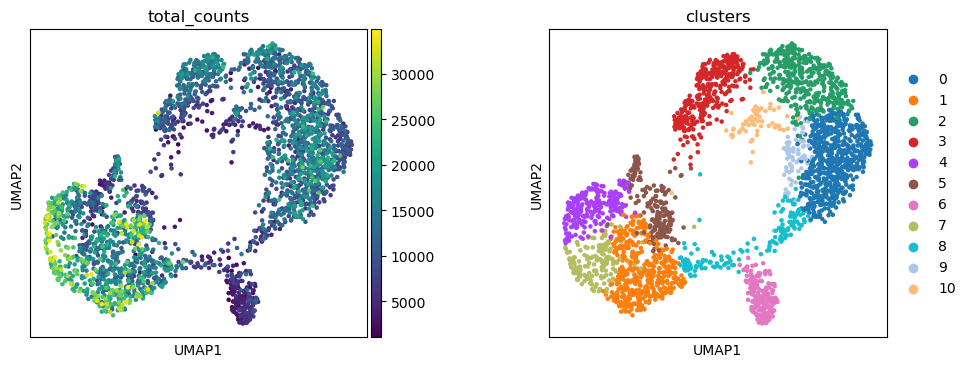

In [25]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata_rna, color=["total_counts", "clusters"], wspace=0.4)


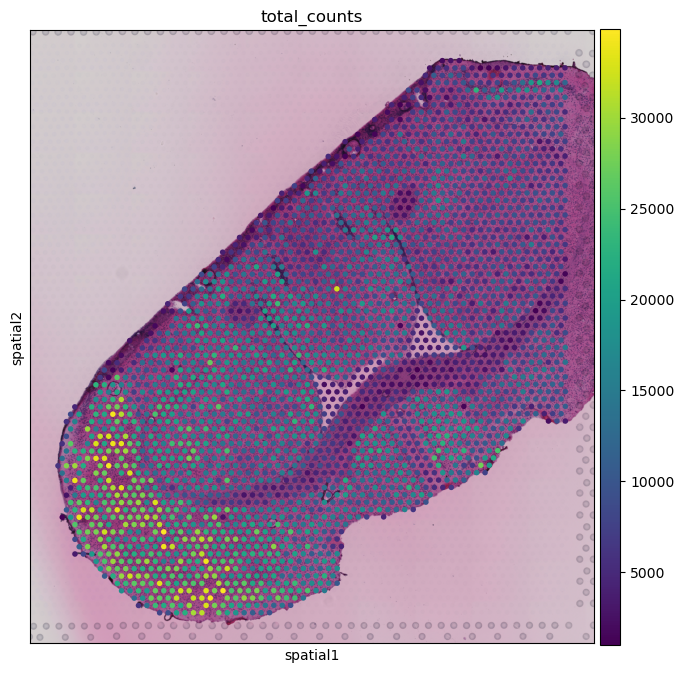

In [21]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata_rna, img_key="hires", color=["total_counts"])


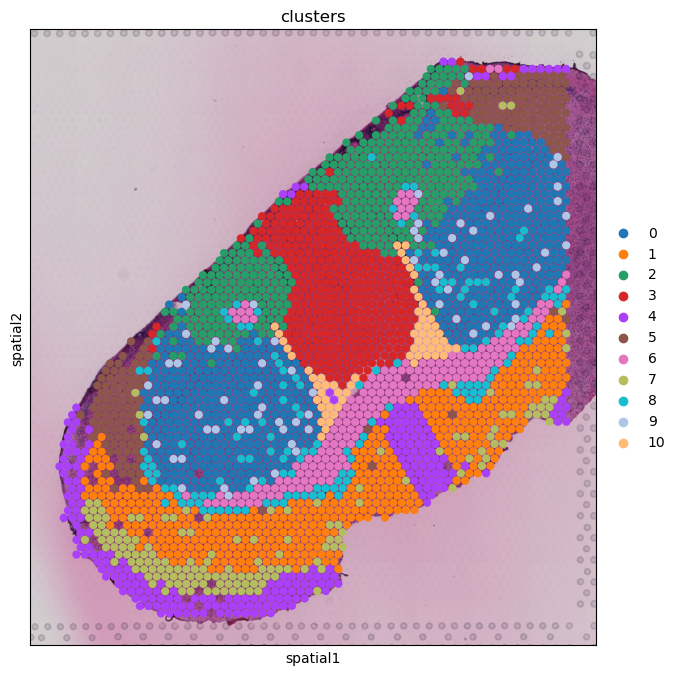

In [22]:
sc.pl.spatial(adata_rna, img_key="hires", color="clusters", size=1.5)


In [26]:
adata_rna

AnnData object with n_obs × n_vars = 2858 × 15845
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'clusters', 'technology'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'technology'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [29]:
sc.pp.calculate_qc_metrics(adata_rna,  inplace=True)


In [30]:
adata_rna

AnnData object with n_obs × n_vars = 2858 × 15845
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'clusters', 'technology', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'technology', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [35]:
adata_rna.X


<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 11219196 stored elements and shape (2858, 15845)>

In [37]:
import squidpy as sq


/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:377: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)
/ictstr01/home/icb/eirini.giannakoulia/tools/apps/mamba/envs/scRNA-env/lib/python3.12/site-packages/scanpy/preprocessing/_pca.py:213: UserWarning: When using a mask parameter with anndata<0.9 on a dense array, the PCAcan have slightly different results due the array being column major instead of row major.
  warnings.warn(


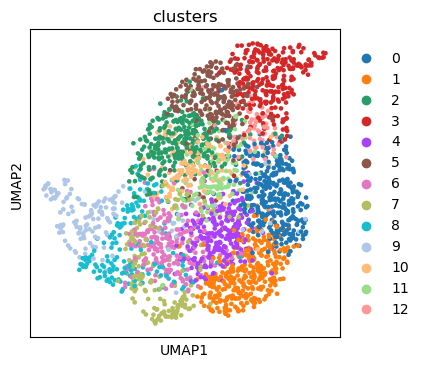

In [ ]:
# Preprocessing steps for MSI data
msi.obsm['raw_counts'] = msi.X.copy()
sc.pp.normalize_total(msi, inplace=True, exclude_highly_expressed=False)
sc.pp.log1p(msi)
sc.pp.highly_variable_genes(msi, flavor='seurat', n_top_genes=500, inplace=True)
sc.pp.pca(msi, n_comps=50, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(msi, n_neighbors=5)
sc.tl.umap(msi)
sc.tl.leiden(msi, key_added='clusters')

# Add spatially variable metabolites
sq.gr.spatial_neighbors(msi)
sq.gr.spatial_autocorr(msi, mode='moran')
     
#Plotting of the MSI data
sc.pl.umap(msi, color='clusters', palette=sc.pl.palettes.default_20)
     


In [41]:
sc.pl.spatial(msi, img_key = "hires", color="clusters", spot_size=1)

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [42]:
msi

AnnData object with n_obs × n_vars = 2681 × 2754
    obs: 'technology', 'clusters'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'raw_counts', 'spatial', 'spatial_warp'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [43]:
msi.uns['spatial']

array([[ 0, 49],
       [ 0, 50],
       [ 0, 51],
       ...,
       [62, 21],
       [62, 22],
       [62, 23]])